# Electricity Demand Forecasting For Leading Electricity Distributor

## Business Context:
One of leading electricity Distribution Company would like to understand demand for electricity for
the next 1-2 years to manage the production of electricity and managing the vendors for the same. It
is one of the important exercises to getting accurate estimation of demand so that they can procure
or produce the electricity as per the demand.

# Business Objective:
#### a. Need to forecast the demand of electricity for next 1-2 years.
#### b. Calculate error metrics (RMSE, RMSPE, MAPE)
#### c. Compare various models including Decomposition, ETS models, ARIMA/SARIMA Models with various parameters etc…

# Import libraries and load the datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['figure.dpi'] = 125
# Loading date wrangling package
from datetime import datetime

C:\Users\Vicky\anaconda31\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Vicky\anaconda31\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\Vicky\anaconda31\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
pwd

'C:\\Users\\Vicky\\Desktop\\Seismology_papers\\ANALYTIX_NOV_2020\\MANUJ\\ML_CLASSES_1_17\\Class-12-13 Files\\Capstone Projects\\13. Capstone Case Study - Demand Estimation'

In [3]:
df=pd.read_csv("C:/Users/Vicky/Desktop/Seismology_papers/ANALYTIX_NOV_2020/MANUJ/ML_CLASSES_1_17/Class-12-13 Files/Capstone Projects/13. Capstone Case Study - Demand Estimation/Electricity Consumption.csv")

In [4]:
df.head()

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [5]:
##Converting normal data into Time Series data using pd.date_range

Now, Define column names, drop nulls, convert Date to DateTime format and make Date as an index column because it is not possible to plot the graph without index.

In [6]:
df.columns=['Date', 'Consumption']
df=df.dropna()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) #set date as index
df.head()

,Consumption
Date,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107


In [7]:
df

,Consumption
Date,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107
...,...
2019-05-01,97.5860
2019-06-01,110.8580
2019-07-01,122.1014


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1973-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  561 non-null    float64
dtypes: float64(1)
memory usage: 8.8 KB


## Checking Missing Values

In [9]:
df.isna().sum()

Consumption    0
dtype: int64

## Checking Duplicate Values

In [10]:
df.duplicated().sum()

0

## let us start

## 1. Visualizing the time series.

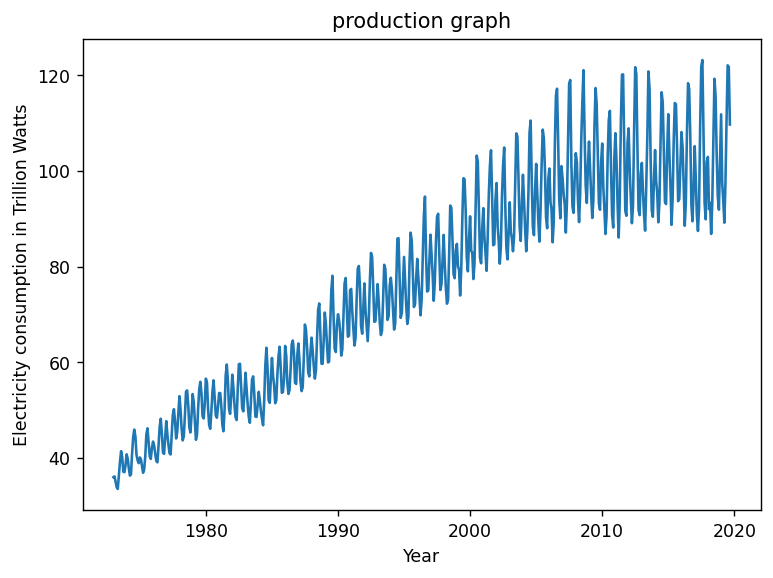

In [11]:
plt.xlabel("Year")
plt.ylabel("Electricity consumption in Trillion Watts")
plt.title("production graph")
plt.plot(df)

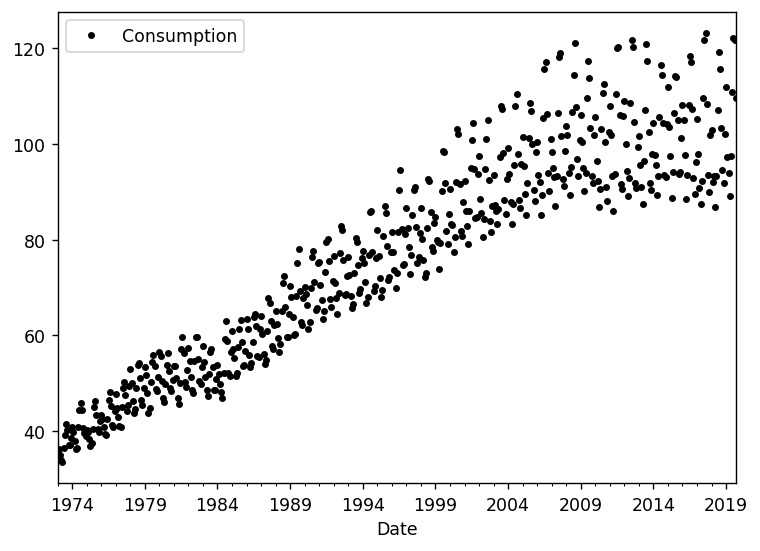

In [12]:
df.plot(style='k.')
plt.show()

In [13]:
# Decomposition of Time Series

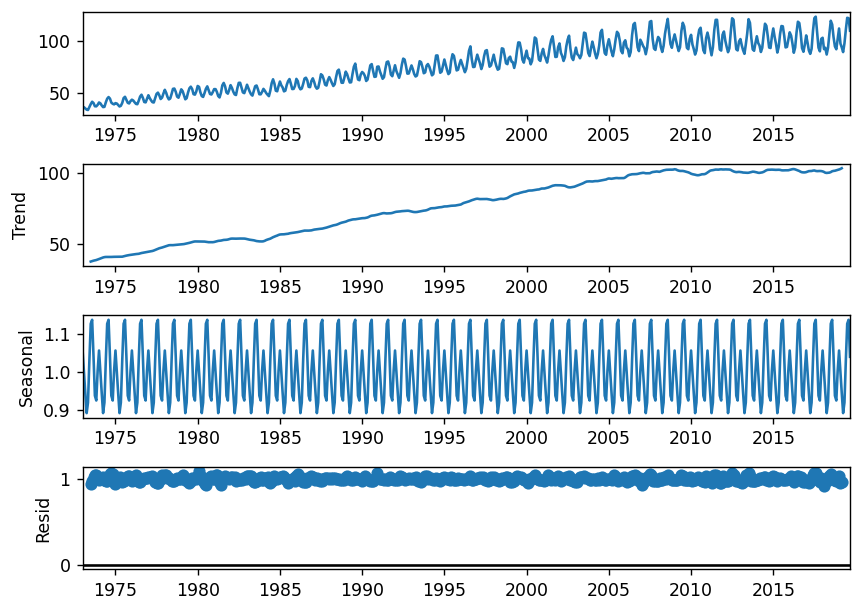

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative')
result.plot()
plt.show()

## 2. Checking the Stationarity of series and if not then stationarising the time series.

#### Using Augmented Dickey Fuller (statistical test) , we identify the series is stationary or non-stationary, Also using Rolling Statistics(Mean, Standard Variance) we can check it 

In [15]:
from statsmodels.tsa.stattools import adfuller


### Function for adfuller test and rolling mean& standard deviation

In [16]:
def rolling_statistics(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
     

In [17]:
#Single function for performing adfuller test

#Ho: It is non stationary or there is a unit root in an AR model, which implies that the time series is not stationary
#H1: It is stationary

#The more negative ADF statistics is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.
        
def adfuller_test(timeseries):
    result=adfuller(timeseries)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
     
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

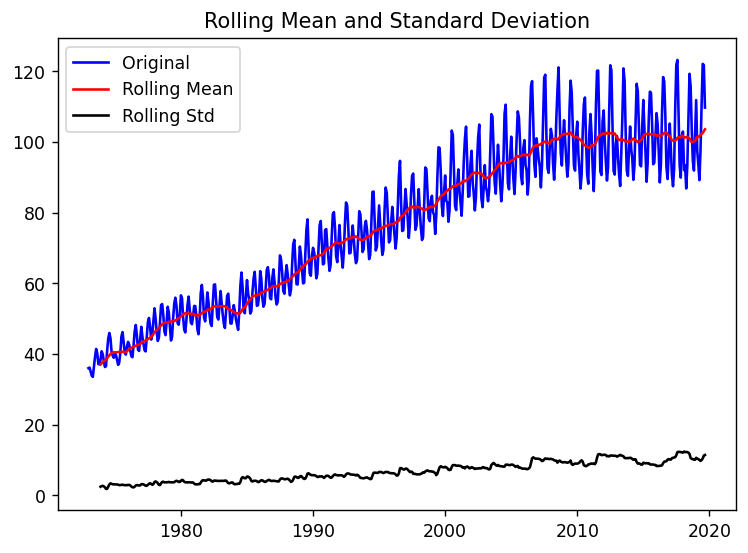

In [18]:
rolling_statistics(df)

In [19]:
adfuller_test(df)

ADF Test Statistic : -1.740593372983243
p-value : 0.41032816044686865
#Lags Used : 15
Number of Observations Used : 545
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
Critical Values:
	1%: -3.442405720052601
	5%: -2.866857804790472
	10%: -2.5696022094099824


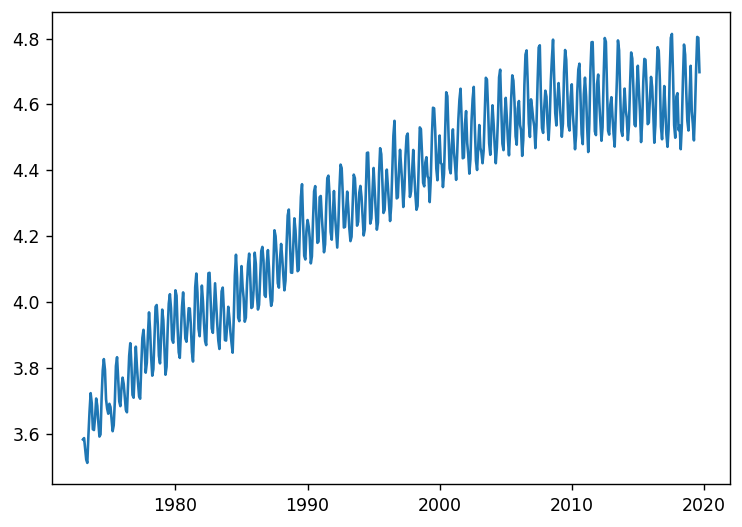

In [20]:

df_log = np.log(df)
plt.plot(df_log)

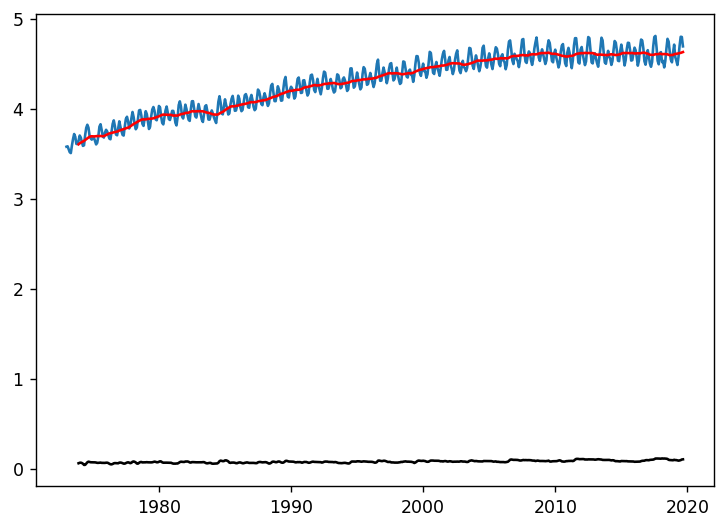

In [21]:
##Rolling statistics ( mean and standard deviation ) of df_log

rolling_mean = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()

plt.plot(df_log)
plt.plot(rolling_mean, color="red")
plt.plot(std_dev, color ="black")

plt.show()

In [22]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1973-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  561 non-null    float64
dtypes: float64(1)
memory usage: 8.8 KB


In [23]:
df_log_moving_avg_diff = df_log-rolling_mean
df_log_moving_avg_diff.dropna(inplace=True)

ADF Test Statistic : -6.45993208712145
p-value : 1.4517259827498713e-08
#Lags Used : 14
Number of Observations Used : 535
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
	1%: -3.4426321555520905
	5%: -2.86695748394138
	10%: -2.5696553279762426


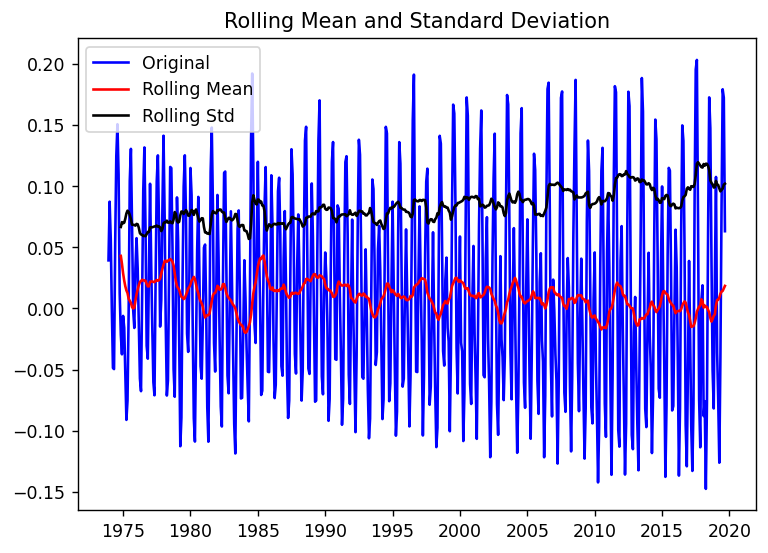

In [24]:
adfuller_test(df_log_moving_avg_diff)
rolling_statistics(df_log_moving_avg_diff)


In [25]:
# Applying exponential decay is another way of transforming a time series such that it is stationary.

### Exponential weighted moving average ( greater weights to recent observations) : 
###### Also to reduce irregularities in the series 

In [26]:

weighted_average = df_log.ewm(halflife=12, min_periods=0,adjust=True).mean()

#The half-life is the time lag at which the exponential weights decay by one half.

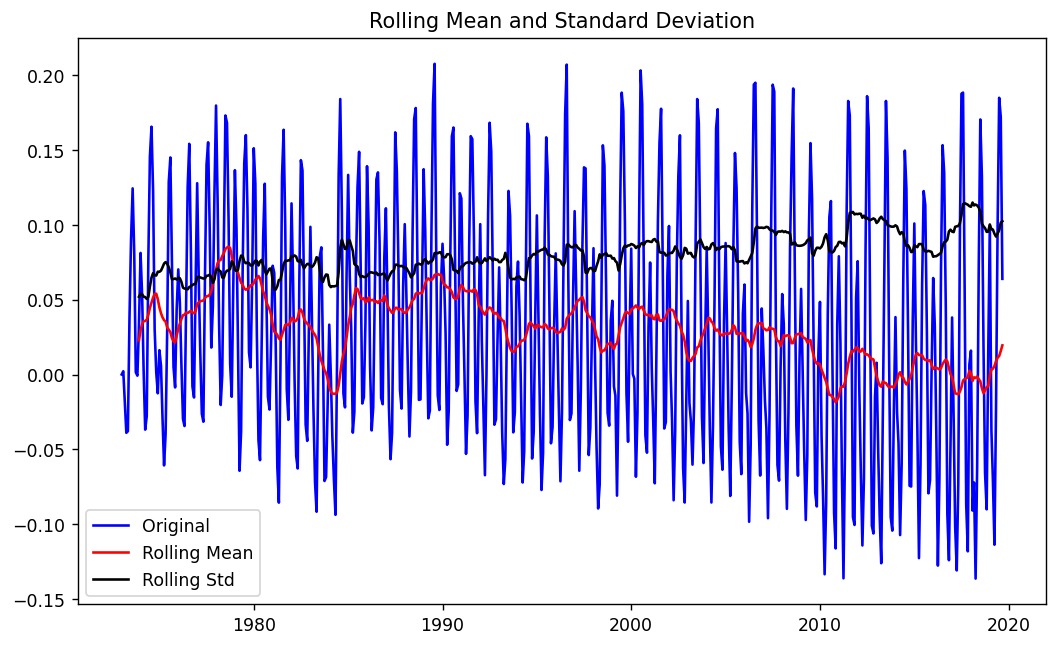

ADF Test Statistic : -3.2369251910434147
p-value : 0.017944355840614365
#Lags Used : 15
Number of Observations Used : 545
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
	1%: -3.442405720052601
	5%: -2.866857804790472
	10%: -2.5696022094099824


In [27]:
df_log_exp_decay = df_log-weighted_average
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
rolling_statistics(df_log_exp_decay)
adfuller_test(df_log_exp_decay)

# Differencing( One method to to remove seasonality ) 

In [28]:
df_log

,Consumption
Date,
1973-01-01,3.582763
1973-02-01,3.587218
1973-03-01,3.557132
1973-04-01,3.521691
1973-05-01,3.511865
...,...
2019-05-01,4.580734
2019-06-01,4.708250
2019-07-01,4.804852


In [29]:
df['consumption First Difference'] = df['Consumption'] - df['Consumption'].shift(1)

# No.of periods to be shift (1)
# index should be in datetime format

In [30]:
df['Seasonal First Difference']=df['Consumption']-df['Consumption'].shift(12)

In [31]:
df.head(14)

,Consumption,consumption First Difference,Seasonal First Difference
Date,,,
1973-01-01,35.9728,NaN,NaN
1973-02-01,36.1334,0.1606,NaN
1973-03-01,35.0625,-1.0709,NaN
1973-04-01,33.8416,-1.2209,NaN
1973-05-01,33.5107,-0.3309,NaN
1973-06-01,36.4823,2.9716,NaN
1973-07-01,39.1412,2.6589,NaN
1973-08-01,41.4137,2.2725,NaN
1973-09-01,40.1639,-1.2498,NaN


In [32]:
df['Seasonal First Difference']

Date
1973-01-01       NaN
1973-02-01       NaN
1973-03-01       NaN
1973-04-01       NaN
1973-05-01       NaN
               ...  
2019-05-01    4.3499
2019-06-01    3.7571
2019-07-01    2.8140
2019-08-01    6.0657
2019-09-01    6.3120
Name: Seasonal First Difference, Length: 561, dtype: float64

In [33]:

adfuller_test(df['Seasonal First Difference'].dropna()) #makesure for dropna, always drop NaN before testing

ADF Test Statistic : -6.283726159436479
p-value : 3.7419901755219934e-08
#Lags Used : 12
Number of Observations Used : 536
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
	1%: -3.442609129942274
	5%: -2.866947348175723
	10%: -2.569649926626197


<AxesSubplot:xlabel='Date'>

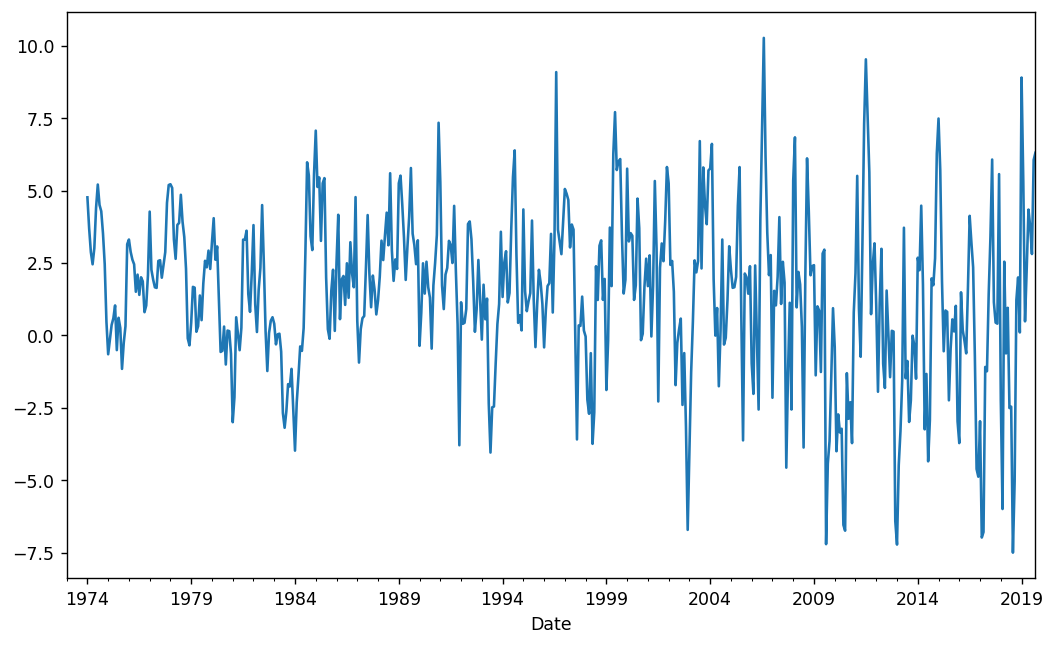

In [34]:
df['Seasonal First Difference'].plot()

In [35]:
df_log

,Consumption
Date,
1973-01-01,3.582763
1973-02-01,3.587218
1973-03-01,3.557132
1973-04-01,3.521691
1973-05-01,3.511865
...,...
2019-05-01,4.580734
2019-06-01,4.708250
2019-07-01,4.804852


In [36]:
#df_log['consumption First Difference'] = df_log['Consumption'] - df_log['Consumption'].shift(1)

In [37]:
#df_log['Seasonal First Difference']=df_log['Consumption']-df_log['Consumption'].shift(12)

In [38]:
#df_log

In [39]:
#adfuller_test(df_log['Seasonal First Difference'].dropna())

In [40]:
#df_log['Seasonal First Difference'].plot()

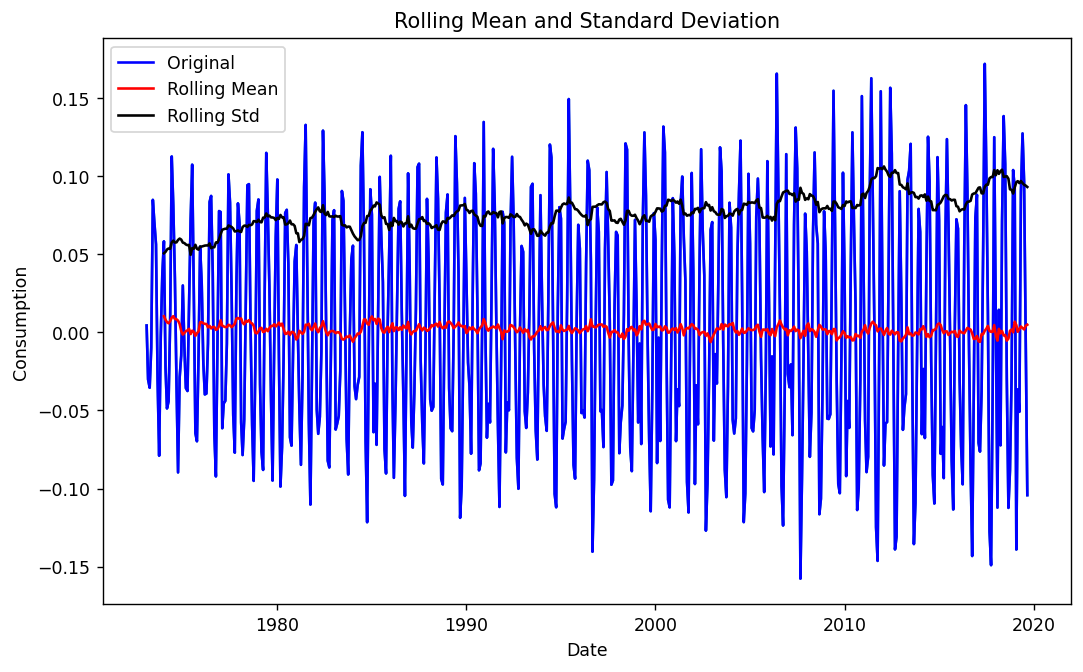

ADF Test Statistic : -6.884809722917903
p-value : 1.4034181751307451e-09
#Lags Used : 14
Number of Observations Used : 545
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
	1%: -3.442405720052601
	5%: -2.866857804790472
	10%: -2.5696022094099824


In [41]:
df_log_diff = df_log - df_log.shift() #by default the period is 1. we can do it by above single syntax also.
df_log_diff.dropna(inplace=True)

plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("Consumption")

#plt.plot(df_log['consumption First Difference'])
plt.plot(df_log_diff)                                          #Let us test the stationarity of our resultant series

#df_log['consumption First Difference'].dropna(inplace=True)
#rolling_statistics(df_log['consumption First Difference'])
#adfuller_test(df_log['consumption First Difference'].dropna())

rolling_statistics(df_log_diff)
adfuller_test(df_log_diff.dropna())


In [42]:
df_log_diff.head()

,Consumption
Date,
1973-02-01,0.004455
1973-03-01,-0.030085
1973-04-01,-0.035441
1973-05-01,-0.009826
1973-06-01,0.084962


#### Now, our df and df_log both are stationary. we seperatley tested adfuller test on both series df and df_log. 

C:\Users\Vicky\AppData\Local\Temp/ipykernel_13888/1594226791.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df_log, model='additive', freq = 12)


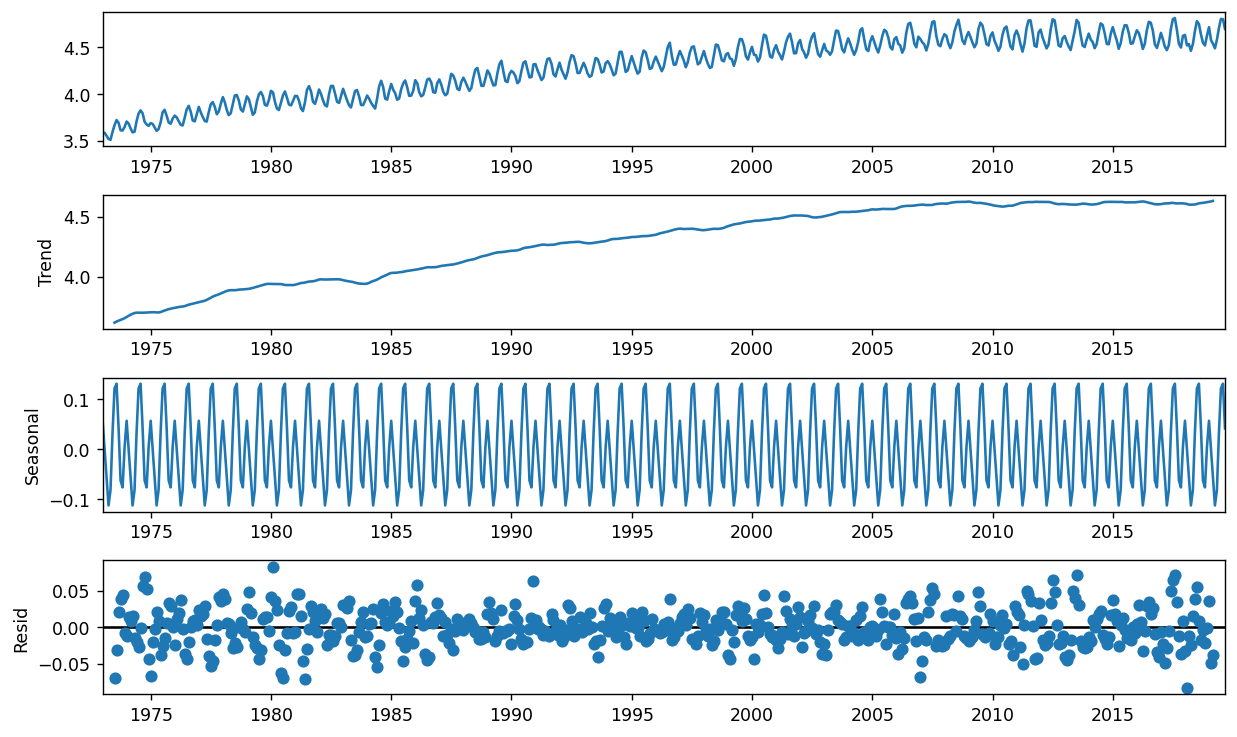

In [43]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_log, model='additive', freq = 12)
result.plot()
plt.show()


ADF Test Statistic : -8.862605061719728
p-value : 1.4690466266306624e-14
#Lags Used : 19
Number of Observations Used : 529
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
	1%: -3.442772146350605
	5%: -2.8670191055991836
	10%: -2.5696881663873414


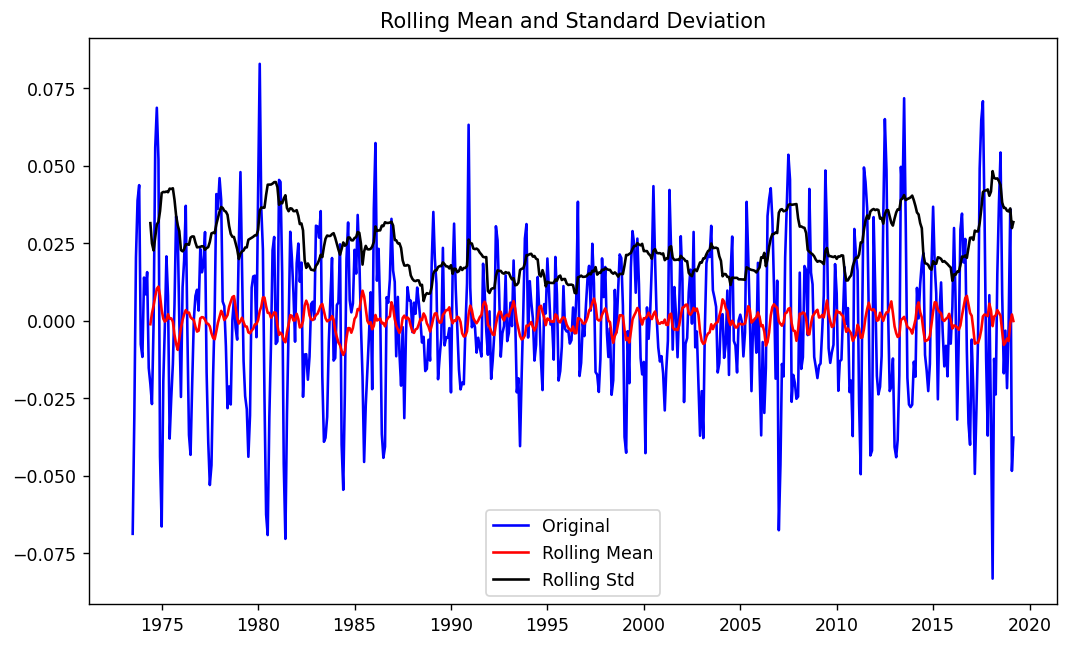

In [44]:
trend = result.trend
trend.dropna(inplace=True)

seasonality = result.seasonal
seasonality.dropna(inplace=True)

residual = result.resid
residual.dropna(inplace=True)

adfuller_test(residual)
rolling_statistics(residual)

plt.show()

## 3. Finding the best parameters for our model

## 3.1 Autoregressive model

## 3.2 Moving Average Model (MA)

## 3.3 Auto Regressive Moving Average (ARMA)

## 3.4 AutoRegressive Integrated Moving Average Model (ARIMA)

### 3.4.1 Autocorrelation Function(ACF)  : MA terms

### 3.4.2 Partial Autocorrelation Function(PACF)  : AR terms

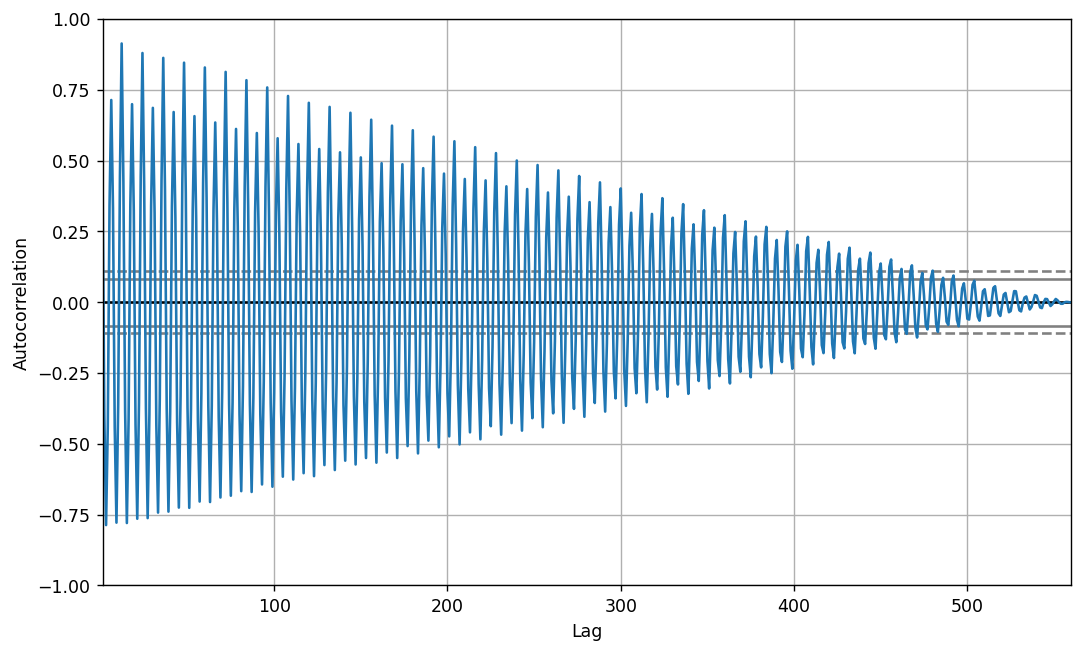

In [45]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_log_diff['Consumption'])  # df_log_diff is a series after df_log - df_log_shift(1), is a stationary
plt.show()                                        #Series

In [46]:
from statsmodels.graphics.tsaplots import plot_acf

Text(0.5, 1.0, 'Auto corelation function')

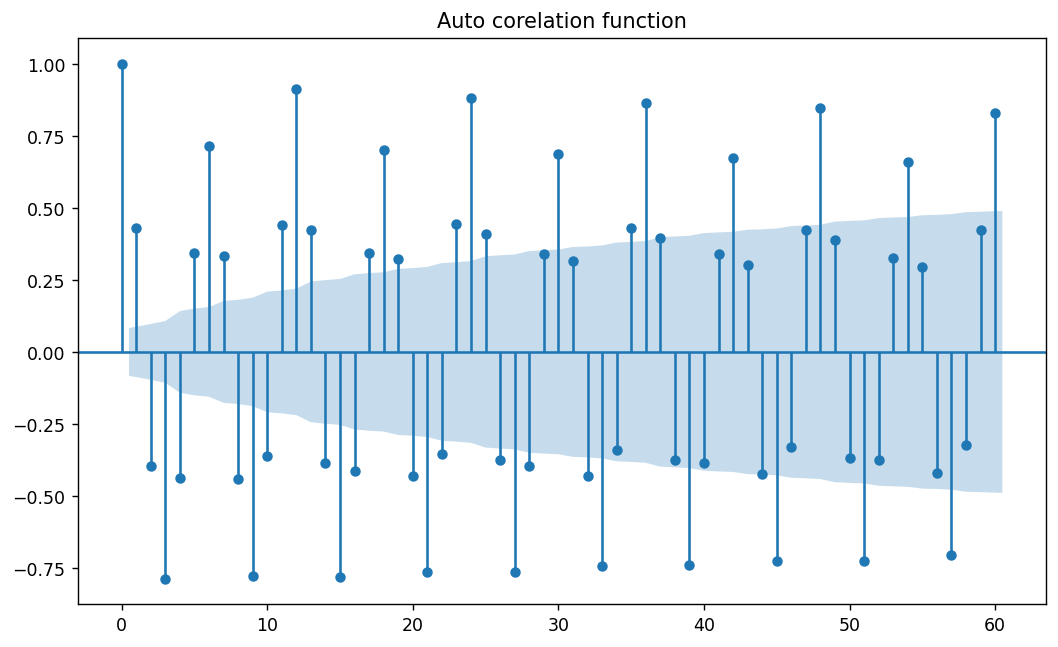

In [47]:
acf=plot_acf(df_log_diff['Consumption'],lags=60)
#plt.subplot(121)
acf
#plt.axhline(y=0,linestyle='-',color='blue')
#plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
#plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Auto corelation function')
#plt.tight_layout()#plot ACF

In [48]:
from statsmodels.graphics.tsaplots import plot_pacf

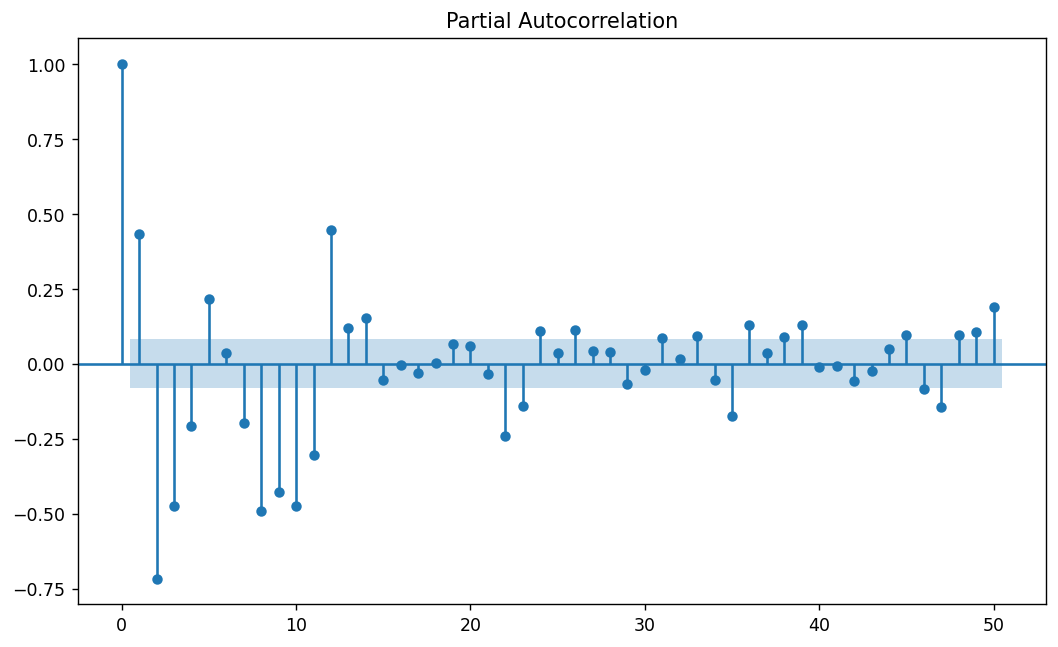

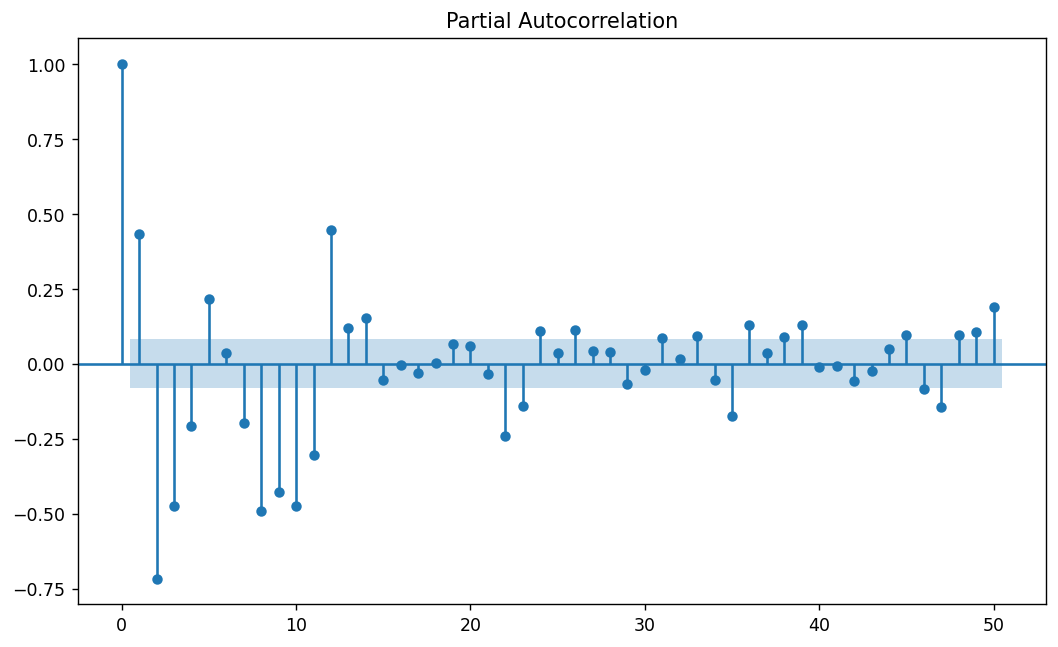

In [49]:
plot_pacf(df_log_diff['Consumption'], lags=50)

## 4. Fitting model


In [50]:
df_log_diff

,Consumption
Date,
1973-02-01,0.004455
1973-03-01,-0.030085
1973-04-01,-0.035441
1973-05-01,-0.009826
1973-06-01,0.084962
...,...
2019-05-01,0.089995
2019-06-01,0.127516
2019-07-01,0.096602


In [51]:
#decomposition = seasonal_decompose(df_log) 

In [52]:
# For non-seasonal data
#p=1, d=1, q=0 or 1      

#p → Number of autoregressive terms,
#d → Number of nonseasonal differences needed for stationarity, and
#q → Number of lagged forecast errors in the prediction equation.

#import statsmodels.api as sm
#import statsmodels.tsa.api as smt
#import statsmodels.formula.api as smf


In [53]:
#from statsmodels.tsa.arima_model import ARIMA
from  statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df_log_diff, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Vicky\anaconda31\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Vicky\anaconda31\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Vicky\anaconda31\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:            Consumption   No. Observations:                  560
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 786.471
Date:                Wed, 22 Dec 2021   AIC                          -1564.943
Time:                        13:00:29   BIC                          -1547.631
Sample:                    02-01-1973   HQIC                         -1558.183
                         - 09-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.005      0.402      0.688      -0.007       0.011
ar.L1          0.1438      0.077      1.871      0.061      -0.007       0.294
ma.L1          0.6090      0.052     11.786      0.0

In [54]:
pred = pd.Series(model_fit.predict(dynamic=False))
pred

1973-02-01    0.001895
1973-03-01    0.003250
1973-04-01   -0.020575
1973-05-01   -0.012142
1973-06-01    0.001598
                ...   
2019-05-01   -0.064303
2019-06-01    0.108525
2019-07-01    0.031524
2019-08-01    0.055143
2019-09-01   -0.033963
Freq: MS, Name: predicted_mean, Length: 560, dtype: float64

In [55]:
final_data = pd.concat((df_log_diff,pred),axis = 1)
final_data

,Consumption,predicted_mean
1973-02-01,0.004455,0.001895
1973-03-01,-0.030085,0.003250
1973-04-01,-0.035441,-0.020575
1973-05-01,-0.009826,-0.012142
1973-06-01,0.084962,0.001598
...,...,...
2019-05-01,0.089995,-0.064303
2019-06-01,0.127516,0.108525
2019-07-01,0.096602,0.031524
2019-08-01,-0.002664,0.055143


<AxesSubplot:>

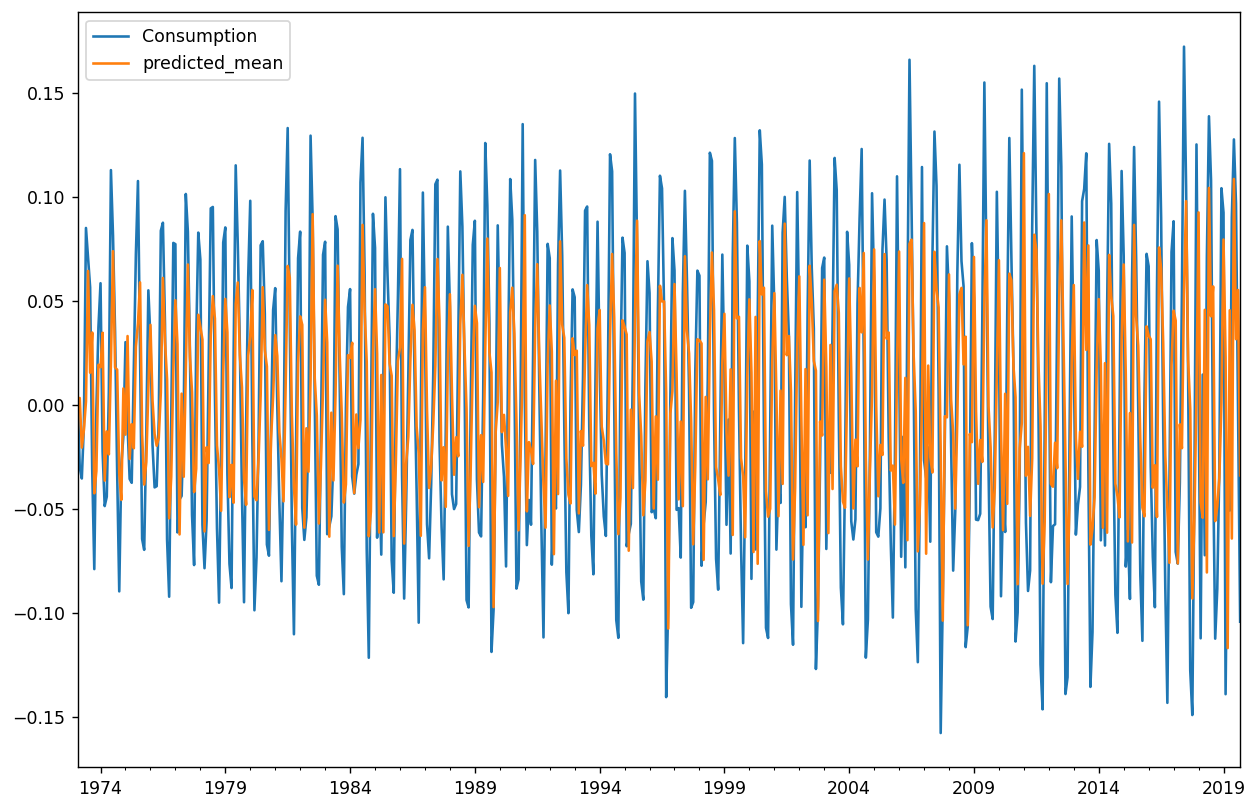

In [56]:
final_data[['Consumption','predicted_mean']].plot(figsize=(12,8))

In [57]:
final_data.tail()

,Consumption,predicted_mean
2019-05-01,0.089995,-0.064303
2019-06-01,0.127516,0.108525
2019-07-01,0.096602,0.031524
2019-08-01,-0.002664,0.055143
2019-09-01,-0.104265,-0.033963


In [63]:
forecasted = model_fit.get_forecast(steps=36, alpha=0.05)

In [97]:
forecasted.predicted_mean

2019-10-01   -0.056182
2019-11-01   -0.006457
2019-12-01    0.000694
2020-01-01    0.001722
2020-02-01    0.001870
2020-03-01    0.001891
2020-04-01    0.001894
2020-05-01    0.001895
2020-06-01    0.001895
2020-07-01    0.001895
2020-08-01    0.001895
2020-09-01    0.001895
2020-10-01    0.001895
2020-11-01    0.001895
2020-12-01    0.001895
2021-01-01    0.001895
2021-02-01    0.001895
2021-03-01    0.001895
2021-04-01    0.001895
2021-05-01    0.001895
2021-06-01    0.001895
2021-07-01    0.001895
2021-08-01    0.001895
2021-09-01    0.001895
2021-10-01    0.001895
2021-11-01    0.001895
2021-12-01    0.001895
2022-01-01    0.001895
2022-02-01    0.001895
2022-03-01    0.001895
2022-04-01    0.001895
2022-05-01    0.001895
2022-06-01    0.001895
2022-07-01    0.001895
2022-08-01    0.001895
2022-09-01    0.001895
Freq: MS, Name: predicted_mean, dtype: float64

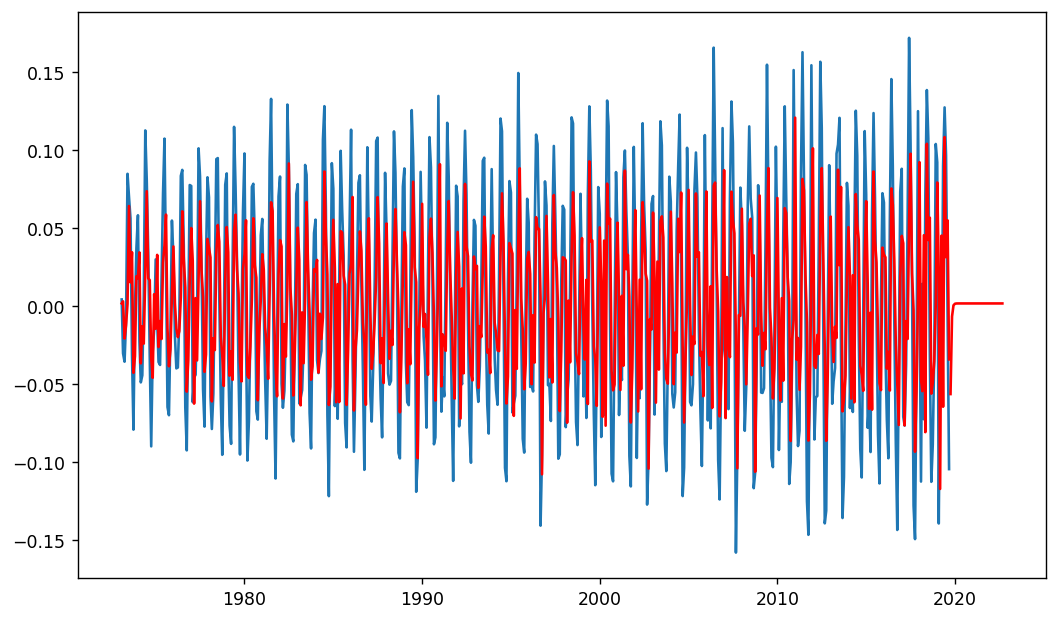

In [104]:
plt.plot(df_log_diff)
plt.plot(model_fit.predict(dynamic=False), color= 'red')
plt.plot(forecasted.predicted_mean, color ='red')

In [65]:
#df_log_diff['forecast']=results.predict(start=300,end=400,dynamic=True)
#pred_dynamic = results.predict(start=pd.to_datetime('1973-01-01'), dynamic=True)
#df_log_diff[['Consumption','forecast']].plot(figsize=(12,8))

In [66]:
#df_log.drop("forecast", axis= 1, inplace= True)

# SARIMAX MODEL

In [67]:
import statsmodels.api as sm

In [68]:
model_sarimax=sm.tsa.statespace.SARIMAX(df_log_diff['Consumption'],order=(1, 0, 1),seasonal_order=(1,0,1,12))
model_fit_sarimax=model_sarimax.fit()
print(model_fit_sarimax.summary())

C:\Users\Vicky\anaconda31\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Vicky\anaconda31\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                        Consumption   No. Observations:                  560
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                1352.259
Date:                            Wed, 22 Dec 2021   AIC                          -2694.517
Time:                                    13:30:18   BIC                          -2672.877
Sample:                                02-01-1973   HQIC                         -2686.067
                                     - 09-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6363      0.047     13.556      0.000       0.544       0.728
ma.L1         -0.9070      0.026   

In [69]:
pred_sarimax = pd.Series(model_fit_sarimax.predict(dynamic=False))
pred_sarimax

1973-02-01    0.000000
1973-03-01   -0.000775
1973-04-01    0.005350
1973-05-01    0.012366
1973-06-01    0.013242
                ...   
2019-05-01    0.057004
2019-06-01    0.128719
2019-07-01    0.089127
2019-08-01   -0.015520
2019-09-01   -0.115205
Freq: MS, Name: predicted_mean, Length: 560, dtype: float64

In [70]:
final_data_sarimax = pd.concat((df_log_diff,pred_sarimax),axis = 1)
final_data_sarimax

,Consumption,predicted_mean
1973-02-01,0.004455,0.000000
1973-03-01,-0.030085,-0.000775
1973-04-01,-0.035441,0.005350
1973-05-01,-0.009826,0.012366
1973-06-01,0.084962,0.013242
...,...,...
2019-05-01,0.089995,0.057004
2019-06-01,0.127516,0.128719
2019-07-01,0.096602,0.089127
2019-08-01,-0.002664,-0.015520


<AxesSubplot:>

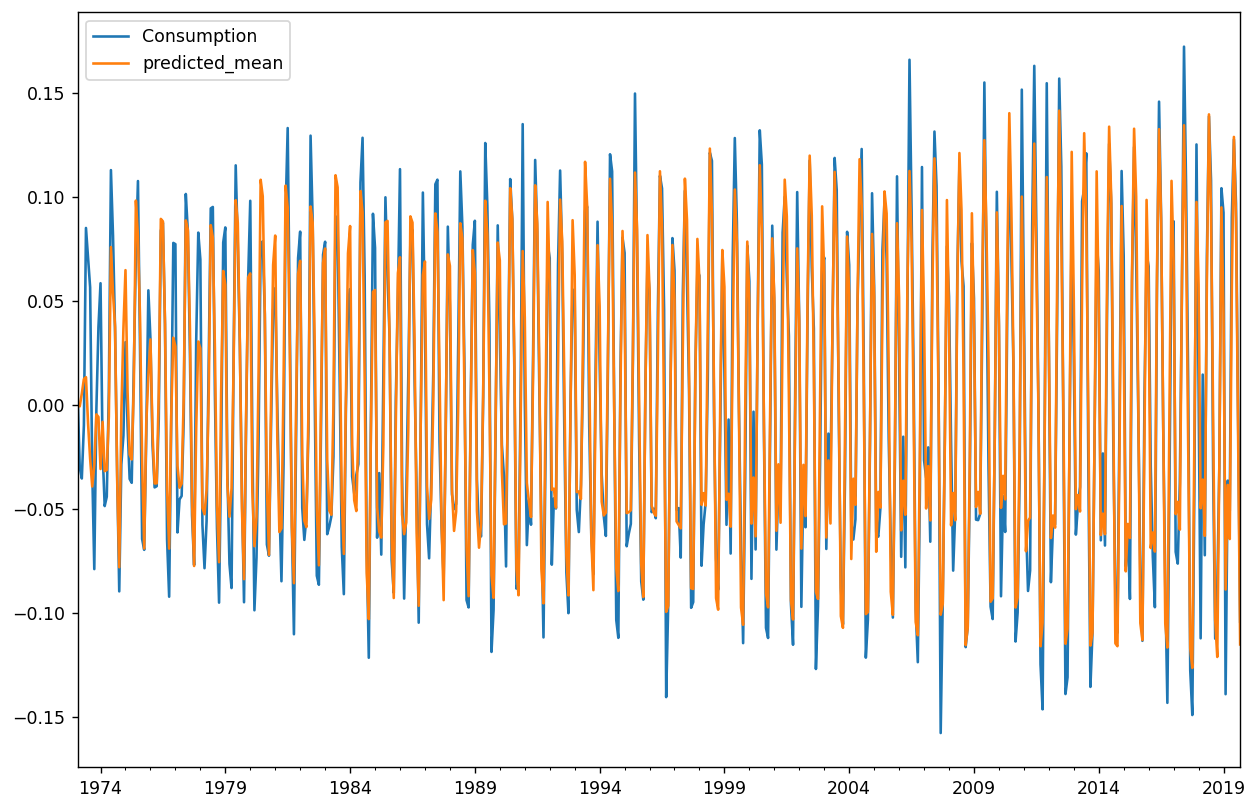

In [71]:
final_data_sarimax[['Consumption','predicted_mean']].plot(figsize=(12,8))

In [72]:
final_data_sarimax.tail()

,Consumption,predicted_mean
2019-05-01,0.089995,0.057004
2019-06-01,0.127516,0.128719
2019-07-01,0.096602,0.089127
2019-08-01,-0.002664,-0.015520
2019-09-01,-0.104265,-0.115205


In [73]:
forecasted_sarimax = model_fit_sarimax.get_forecast(steps=36, alpha=0.05)

In [74]:
forecasted_sarimax.predicted_mean

2019-10-01   -0.124107
2019-11-01   -0.028441
2019-12-01    0.096089
2020-01-01    0.056769
2020-02-01   -0.089506
2020-03-01   -0.041286
2020-04-01   -0.062755
2020-05-01    0.066332
2020-06-01    0.135777
2020-07-01    0.095302
2020-08-01   -0.007843
2020-09-01   -0.106605
2020-10-01   -0.117843
2020-11-01   -0.024656
2020-12-01    0.098042
2021-01-01    0.058029
2021-02-01   -0.088203
2021-03-01   -0.040519
2021-04-01   -0.062121
2021-05-01    0.066311
2021-06-01    0.135390
2021-07-01    0.095021
2021-08-01   -0.007748
2021-09-01   -0.106139
2021-10-01   -0.117347
2021-11-01   -0.024542
2021-12-01    0.097660
2022-01-01    0.057804
2022-02-01   -0.087847
2022-03-01   -0.040355
2022-04-01   -0.061872
2022-05-01    0.066047
2022-06-01    0.134850
2022-07-01    0.094642
2022-08-01   -0.007717
2022-09-01   -0.105715
Freq: MS, Name: predicted_mean, dtype: float64

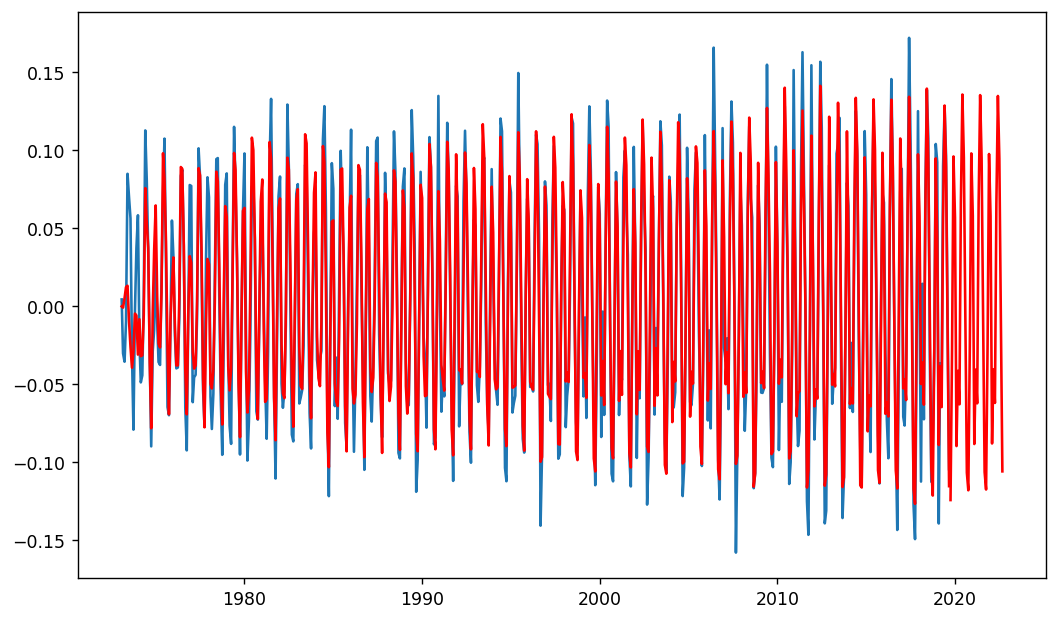

In [106]:
plt.plot(df_log_diff)
plt.plot(model_fit_sarimax.predict(dynamic=False), color ='red')
plt.plot(forecasted_sarimax.predicted_mean, color ='red')

In [107]:
## from both model forecast done till 01-09-2022,now we will plot the data and see the accuracy metrices. 

In [178]:
final_data_sarimax

,Consumption,predicted_mean
1973-02-01,0.004455,0.000000
1973-03-01,-0.030085,-0.000775
1973-04-01,-0.035441,0.005350
1973-05-01,-0.009826,0.012366
1973-06-01,0.084962,0.013242
...,...,...
2019-05-01,0.089995,0.057004
2019-06-01,0.127516,0.128719
2019-07-01,0.096602,0.089127
2019-08-01,-0.002664,-0.015520


## Accuracy metrics

In [134]:
def forecast_accuracy(ac, fo):
    mape =np.mean(np.abs(final_data.Consumption-final_data.predicted_mean)/np.abs(final_data.Consumption)) #MAPE
    mean =np.mean(final_data.Consumption-final_data.predicted_mean) #MEAN
    mae = np.mean(np.abs(final_data.Consumption-final_data.predicted_mean))   #MAE
    mpe= np.mean(final_data.Consumption-final_data.predicted_mean)/final_data.Consumption# MPE
    rmse = np.mean((final_data.Consumption-final_data.predicted_mean)**2)**.5 #RMSE
    corr = np.corrcoef(final_data.Consumption-final_data.predicted_mean)[0,1]  #corr

    return({'MAPE' : mape, 'MEAN' : mean, 'MAE' :mae , 'MPE':mpe, 'RMSE' : rmse, 'CORR':corr})


In [179]:
mape= np.mean(np.abs(final_data.Consumption-final_data.predicted_mean)/np.abs(final_data.Consumption)) #MAPE

mape2= np.mean(np.abs(final_data_sarimax.Consumption-final_data_sarimax.predicted_mean)/np.abs(final_data_sarimax.Consumption)) #MAPE

In [186]:
print('value of mape is',mape)
print('value of mape2 is',mape2)

value of mape is 1.7365929159027083
value of mape2 is 0.6075498108273264


In [187]:
mean =np.mean(final_data.Consumption-final_data.predicted_mean) #MEAN mae = np.mean(np.abs(final_data.Consumption-final_data.predicted_mean))   #MAE

mean2 =np.mean(final_data_sarimax.Consumption-final_data_sarimax.predicted_mean) #MEAN mae = np.mean(np.abs(final_data.Consumption-final_data.predicted_mean))   #MAE


In [190]:
print('value of mean is',mean)
print('value of mean2 is',mean2)

value of mean is -1.5202479473631779e-05
value of mean2 is -0.0010073165489401543


In [191]:
mpe= np.mean(final_data.Consumption-final_data.predicted_mean)/final_data.Consumption# MPE
mpe2= np.mean(final_data_sarimax.Consumption-final_data_sarimax.predicted_mean)/final_data_sarimax.Consumption# MPE

In [192]:
print('value of mpe is',mpe)
print('value of mpe2 is',mpe2)

value of mpe is 1973-02-01   -0.003413
1973-03-01    0.000505
1973-04-01    0.000429
1973-05-01    0.001547
1973-06-01   -0.000179
                ...   
2019-05-01   -0.000169
2019-06-01   -0.000119
2019-07-01   -0.000157
2019-08-01    0.005706
2019-09-01    0.000146
Name: Consumption, Length: 560, dtype: float64
value of mpe2 is 1973-02-01   -0.226132
1973-03-01    0.033482
1973-04-01    0.028422
1973-05-01    0.102515
1973-06-01   -0.011856
                ...   
2019-05-01   -0.011193
2019-06-01   -0.007900
2019-07-01   -0.010428
2019-08-01    0.378058
2019-09-01    0.009661
Name: Consumption, Length: 560, dtype: float64


In [193]:

rmse = np.mean((final_data.Consumption-final_data.predicted_mean)**2)**.5 #RMSE

rmse2 = np.mean((final_data_sarimax.Consumption-final_data_sarimax.predicted_mean)**2)**.5 #RMSE

In [194]:
print('value of rmse is',rmse)
print('value of rmse2 is',rmse2)

value of rmse is 0.05937472154098691
value of rmse2 is 0.022354132315968656


From above RMSE and MAPE metices we can say the SARIMAX model works well with lower error. So, we selected SARIMAX instead of ARIMA model. 

## Thank you 